* Les données contiennent quatre variables indépendantes et une variable dépendante (« buy »). 
* Je veux créer des modèles de classification qui prévoient si un visiteur achètera, en fonction de l’information dans les quatre autres colonnes.
* Comparer pour chaque modèle les resultats avec et sans SMOTE.
* Comparer les perfermance des tout les modèle.

**Somaire:**
* Data
* SMOTE
* Logistic regression
* Decision tree
* Random Forest
* SVM
* XGBoost

## **Data**

In [ ]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.under_sampling import NearMiss 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
import seaborn as sns
from pandas import read_csv
from matplotlib.image import FigureImage
from matplotlib.pyplot import figure

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv')
df.head()

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1


In [ ]:
df.describe()

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,181.660000,2.022000,0.375000,0.395000,0.050000
std,62.405054,0.614731,0.484365,0.489095,0.218054
min,-34.000000,-0.000000,0.000000,0.000000,0.000000
25%,144.000000,2.000000,0.000000,0.000000,0.000000
50%,179.000000,2.000000,0.000000,0.000000,0.000000
75%,221.000000,2.000000,1.000000,1.000000,0.000000
max,439.000000,4.000000,1.000000,1.000000,1.000000


In [ ]:
df['buy'].value_counts()

0    950
1     50
Name: buy, dtype: int64

In [ ]:

X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 


(1000, 4) (1000,)


## **SMOTE**

In [ ]:
print("Avant SMOTE, '1': {}".format(sum(y_train == 1))) 

print("Avant SMOTE, '0': {} \n".format(sum(y_train == 0))) 

X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train.ravel()) 

print("Apres SMOTE,  '1': {}".format(sum(y_train_res == 1))) 

print("Apres SMOTE,  '0': {}".format(sum(y_train_res == 0))) 
 

Avant SMOTE, '1': 34
Avant SMOTE, '0': 666 

Apres SMOTE,  '1': 666
Apres SMOTE,  '0': 666


## **Logistic Regression**

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       284
           1       0.62      0.50      0.55        16

    accuracy                           0.96       300
   macro avg       0.79      0.74      0.76       300
weighted avg       0.95      0.96      0.95       300

AUC: 0.741


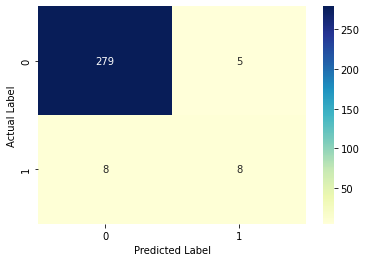

In [ ]:

# logistic regression object 
lr = LogisticRegression() 

lr.fit(X_train, y_train.ravel()) 

predictionslr = lr.predict(X_test) 

# classification report 
cnf_matrix = confusion_matrix(y_test, predictionslr )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predictionslr)) 
auc = roc_auc_score(y_test, predictionslr)
print('AUC: %.3f' % auc)


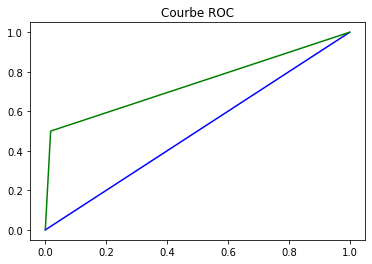

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionslr,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.89      0.94       284
           1       0.28      0.75      0.41        16

    accuracy                           0.88       300
   macro avg       0.63      0.82      0.67       300
weighted avg       0.95      0.88      0.91       300

AUC: 0.820


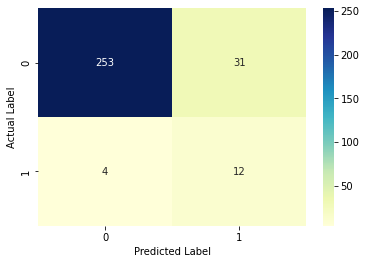

In [ ]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 

predictionslr1 = lr1.predict(X_test) 

  
# classification report 
cnf_matrix = confusion_matrix(y_test, predictionslr1 )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(classification_report(y_test, predictionslr1))
auc = roc_auc_score(y_test, predictionslr1)
print('AUC: %.3f' % auc) 


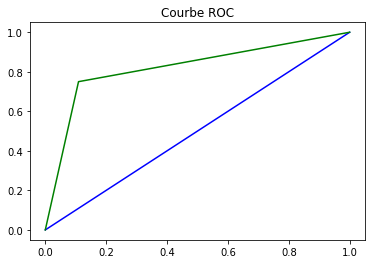

In [ ]:
fprSm1, tprSm1, _ = metrics.roc_curve(y_test, predictionslr1,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm1,tprSm1,"g")
plt.title("Courbe ROC")
plt.show()

* recall des non acheteurs est passé de 0,98 à 0,89 : il y a plus de non acheteurs que nous n’avons pas réussi à trouver
* recall des acheteurs est passé de 0,50 à 0,75 : nous avons réussi à identifier beaucoup plus d’acheteurs
* La précision des acheteurs est passée de 0,62 à 0,28 : le coût de l’identification correcte d’un plus grand nombre d’acheteurs est que nous identifions maintenant incorrectement un plus grand nombre d’acheteurs (identifiant les visiteurs comme acheteurs alors qu’ils ne sont pas réellement acheteurs) !

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import accuracy_score

lr=[roc_auc_score(y_test, predictionslr),precision_score(y_test,predictionslr),
recall_score(y_test,predictionslr),
f1_score (y_test,predictionslr),
accuracy_score (y_test,predictionslr)]
lr1=[roc_auc_score(y_test, predictionslr1),precision_score(y_test,predictionslr1),
recall_score(y_test,predictionslr1),
f1_score (y_test,predictionslr1),
accuracy_score (y_test,predictionslr1)]

No handles with labels found to put in legend.


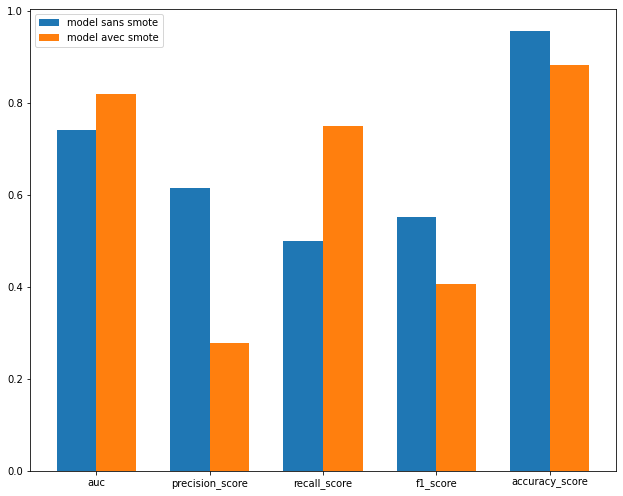

In [ ]:
from matplotlib.image import FigureImage
from matplotlib.pyplot import figure


metr= ["auc","precision_score", "recall_score", "f1_score", "accuracy_score"]

position = np.arange(len(metr))

largeur = .35


fig, ax = plt.subplots()
label=['lr','lr1']
plt.legend()
r1 = ax.bar(position - largeur/2, lr, largeur,label='model sans smote')
r2 = ax.bar(position + largeur/2, lr1, largeur,label='model avec smote')

ax.set_xticks(position)
ax.set_xticklabels(metr)
ax.legend()
fig.set_size_inches(10.5, 8.5, forward=True)

## **Decision Tree**

Decision Tree Classifier Created
Classification report - 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       284
           1       0.50      0.62      0.56        16

    accuracy                           0.95       300
   macro avg       0.74      0.79      0.76       300
weighted avg       0.95      0.95      0.95       300

AUC: 0.795


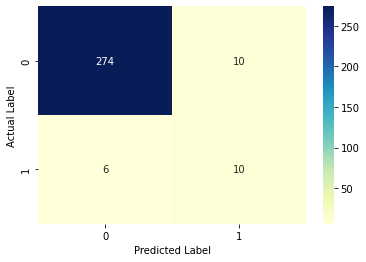

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree.fit(X_train, y_train.ravel())
print('Decision Tree Classifier Created')
predictionsdt = dtree.predict(X_test)

# classification report 
cnf_matrix = confusion_matrix(y_test, predictionsdt )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print("Classification report - \n", classification_report(y_test,predictionsdt))
auc = roc_auc_score(y_test, predictionsdt)
print('AUC: %.3f' % auc) 

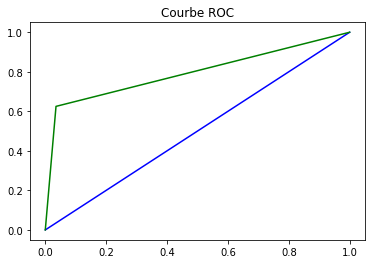

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionsdt,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

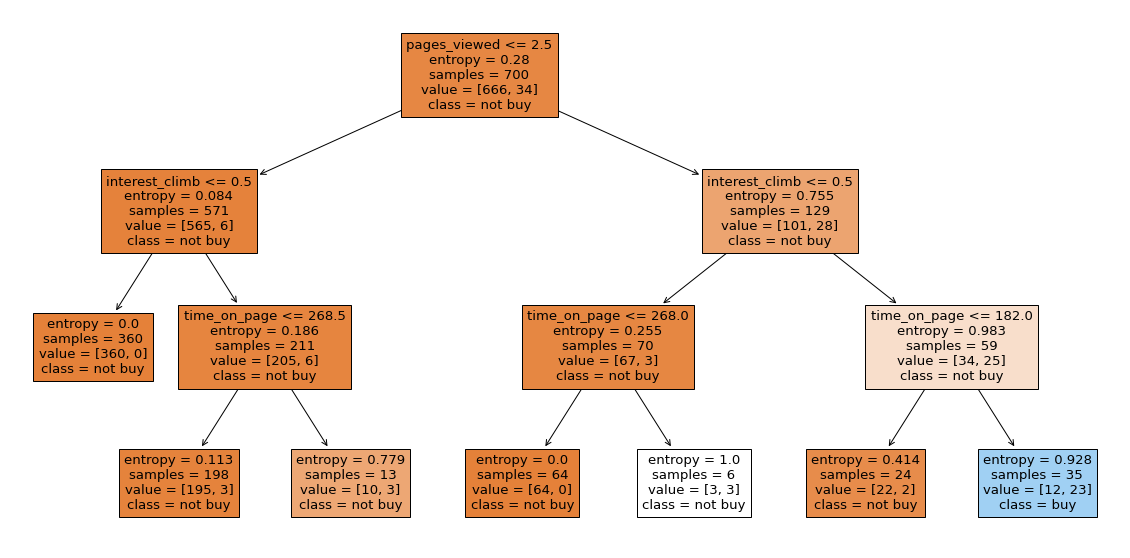

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names = list(df.columns[:-1]),class_names=['not buy','buy'],filled=True)
plt.show()


Decision Tree Classifier Created
Classification report - 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       284
           1       0.38      0.69      0.49        16

    accuracy                           0.92       300
   macro avg       0.68      0.81      0.72       300
weighted avg       0.95      0.92      0.93       300

AUC: 0.812


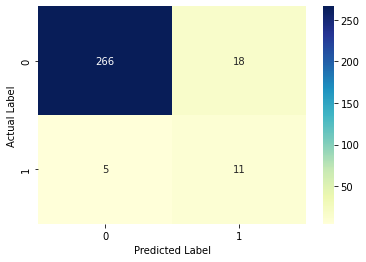

In [ ]:
dtree1=DecisionTreeClassifier(criterion="entropy", max_depth=4)
dtree1.fit(X_train_res, y_train_res.ravel())
print('Decision Tree Classifier Created')
predictionsdt1 = dtree1.predict(X_test)

# classification report 
cnf_matrix = confusion_matrix(y_test, predictionsdt1 )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print("Classification report - \n", classification_report(y_test,predictionsdt1))
auc = roc_auc_score(y_test, predictionsdt1)
print('AUC: %.3f' % auc) 

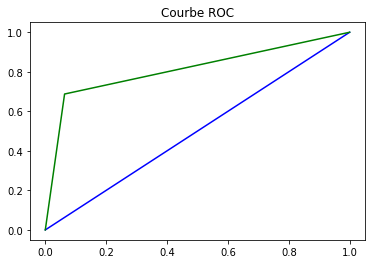

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionsdt1,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

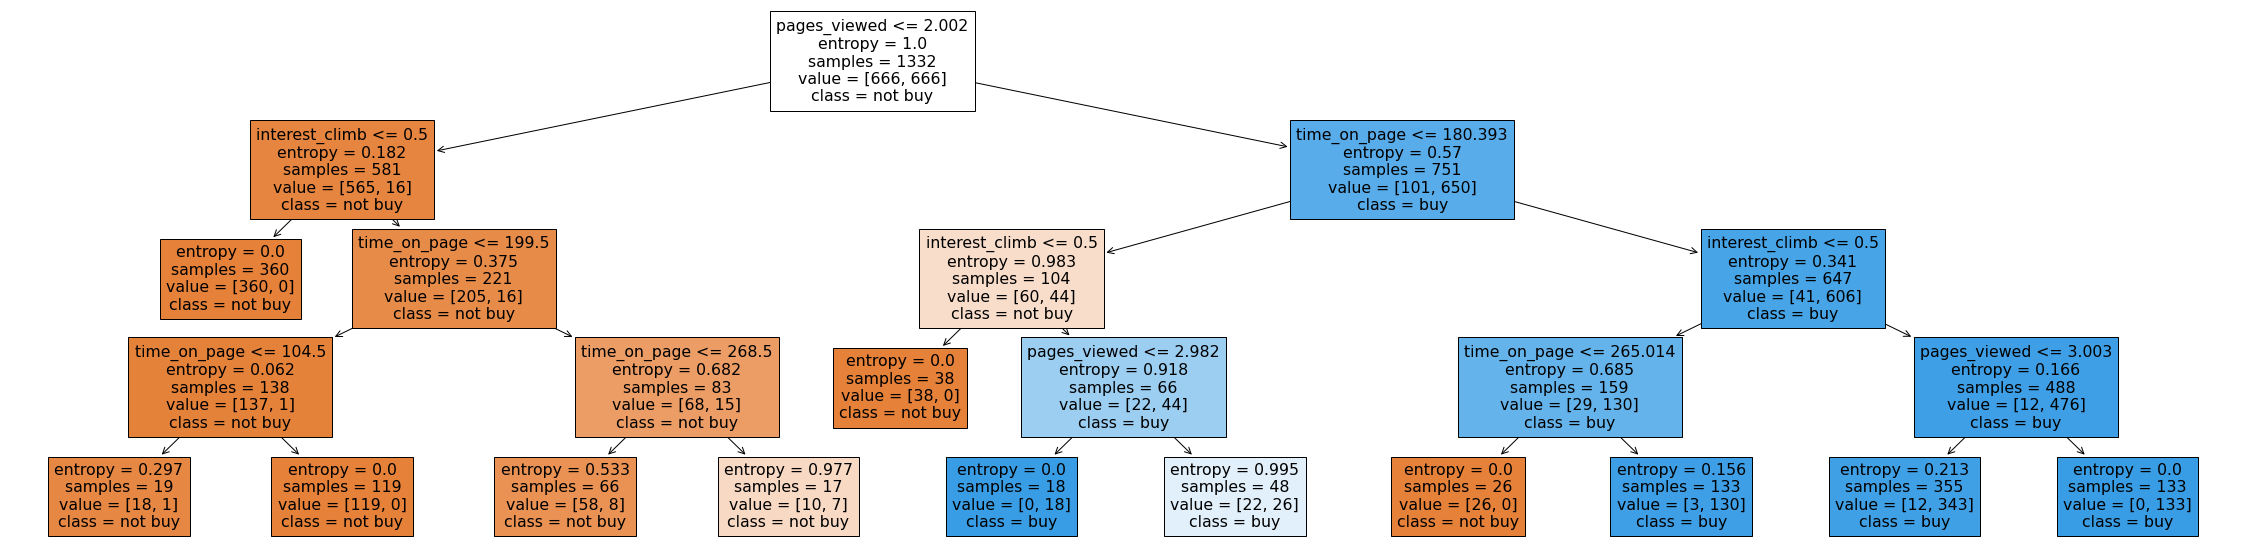

In [ ]:
plt.figure(figsize=(40,10))
plot_tree(dtree1,feature_names = list(df.columns[:-1]),class_names=['not buy','buy'],filled=True)
plt.show()

In [ ]:

dt=[roc_auc_score(y_test, predictionsdt),precision_score(y_test,predictionsdt),
recall_score(y_test,predictionsdt),
f1_score (y_test,predictionsdt),
accuracy_score (y_test,predictionsdt)]
dt1=[roc_auc_score(y_test, predictionsdt1),precision_score(y_test,predictionsdt1),
recall_score(y_test,predictionsdt1),
f1_score (y_test,predictionsdt1),
accuracy_score (y_test,predictionsdt1)]

No handles with labels found to put in legend.


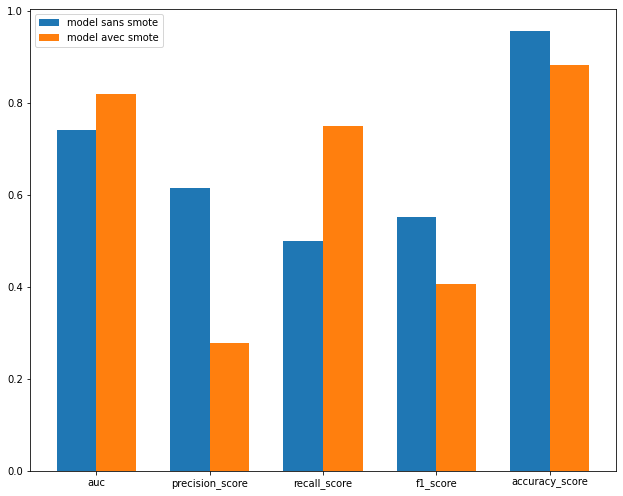

In [ ]:
metr= ["auc","precision_score", "recall_score", "f1_score", "accuracy_score"]

position = np.arange(len(metr))

largeur = .35


fig, ax = plt.subplots()
label=['lr','lr1']
plt.legend()
r1 = ax.bar(position - largeur/2, lr, largeur,label='model sans smote')
r2 = ax.bar(position + largeur/2, lr1, largeur,label='model avec smote')

ax.set_xticks(position)
ax.set_xticklabels(metr)
ax.legend()
fig.set_size_inches(10.5, 8.5, forward=True)

## **Random Forest**

AUC: 0.741
Classification report - 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       284
           1       0.62      0.50      0.55        16

    accuracy                           0.96       300
   macro avg       0.79      0.74      0.76       300
weighted avg       0.95      0.96      0.95       300



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 15.0, 'Predicted Label')

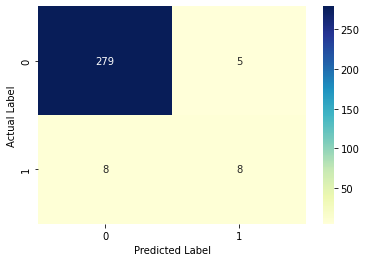

In [ ]:

rf = RandomForestClassifier(max_depth=6, random_state = 0, oob_score = True)
rf.fit(X_train, y_train.ravel());
predictionsrf = rf.predict(X_test)

# classification report 
auc = roc_auc_score(y_test, predictionsrf)
print('AUC: %.3f' % auc) 
print("Classification report - \n", classification_report(y_test,predictionsrf))
cnf_matrix = confusion_matrix(y_test, predictionsrf )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


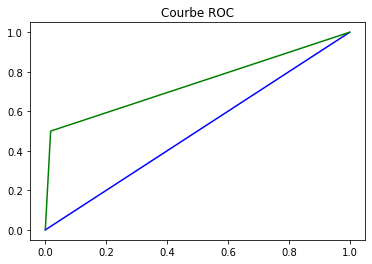

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionsrf,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

In [ ]:
rf.oob_score_

0.9614285714285714

In [ ]:
feature_imp = pd.Series(rf.feature_importances_).sort_values(ascending = False)
feature_imp

0    0.470940
1    0.355468
3    0.127423
2    0.046168
dtype: float64

AUC: 0.816
Classification report - 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       284
           1       0.41      0.69      0.51        16

    accuracy                           0.93       300
   macro avg       0.69      0.82      0.74       300
weighted avg       0.95      0.93      0.94       300



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 15.0, 'Predicted Label')

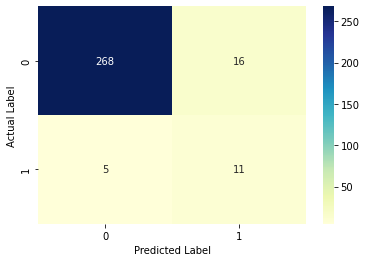

In [ ]:

rf1 = RandomForestClassifier(max_depth=6, random_state = 0, oob_score = True)
rf1.fit(X_train_res, y_train_res.ravel());
predictionsrf1 = rf1.predict(X_test)

# classification report 
auc = roc_auc_score(y_test, predictionsrf1)
print('AUC: %.3f' % auc) 
print("Classification report - \n", classification_report(y_test,predictionsrf1))
cnf_matrix = confusion_matrix(y_test, predictionsrf1 )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label') 

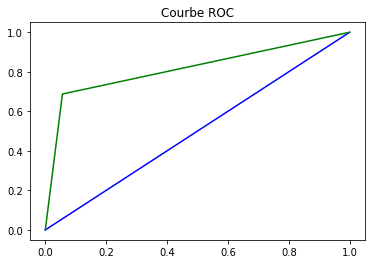

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionsrf1,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

In [ ]:
rf1.oob_score_

0.9714714714714715

In [ ]:
feature_imp = pd.Series(rf1.feature_importances_).sort_values(ascending = False)
feature_imp

1    0.617276
0    0.276579
3    0.099688
2    0.006457
dtype: float64

In [ ]:

rf=[roc_auc_score(y_test, predictionsrf),precision_score(y_test,predictionsrf),
recall_score(y_test,predictionsrf),
f1_score (y_test,predictionsrf),
accuracy_score (y_test,predictionsrf)]
rf1=[roc_auc_score(y_test, predictionsrf1),precision_score(y_test,predictionsrf1),
recall_score(y_test,predictionsrf1),
f1_score (y_test,predictionsrf1),
accuracy_score (y_test,predictionsrf1)]

No handles with labels found to put in legend.


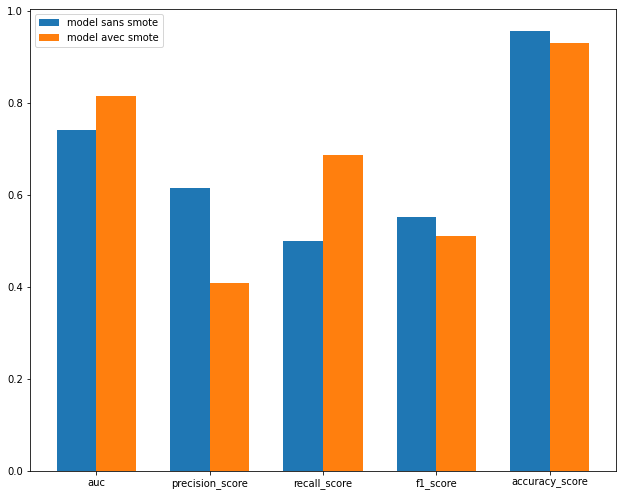

In [ ]:
from matplotlib.image import FigureImage
from matplotlib.pyplot import figure


metr= ["auc","precision_score", "recall_score", "f1_score", "accuracy_score"]

position = np.arange(len(metr))

largeur = .35


fig, ax = plt.subplots()
label=['rf','rf1']
plt.legend()
r1 = ax.bar(position - largeur/2, rf, largeur,label='model sans smote')
r2 = ax.bar(position + largeur/2, rf1, largeur,label='model avec smote')

ax.set_xticks(position)
ax.set_xticklabels(metr)
ax.legend()
fig.set_size_inches(10.5, 8.5, forward=True)

## **SVM**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       284
           1       0.64      0.56      0.60        16

    accuracy                           0.96       300
   macro avg       0.81      0.77      0.79       300
weighted avg       0.96      0.96      0.96       300

AUC: 0.772


Text(0.5, 15.0, 'Predicted Label')

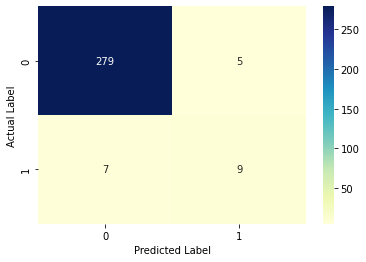

In [ ]:

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
predictionsSVC = classifier.predict(X_test)

# classification report 
print(classification_report(y_test, predictionsSVC))
auc = roc_auc_score(y_test, predictionsSVC)
print('AUC: %.3f' % auc) 
cnf_matrix = confusion_matrix(y_test, predictionsSVC)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

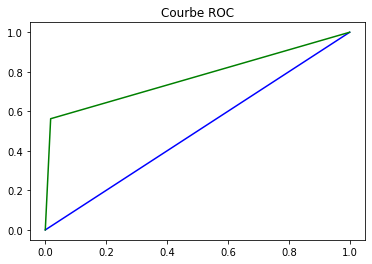

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionsSVC,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.89      0.94       284
           1       0.29      0.75      0.41        16

    accuracy                           0.89       300
   macro avg       0.64      0.82      0.68       300
weighted avg       0.95      0.89      0.91       300

AUC: 0.822


Text(0.5, 15.0, 'Predicted Label')

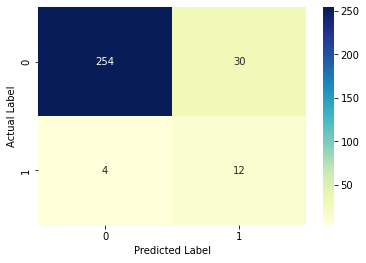

In [ ]:

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_res, y_train_res)
predictionsSVC1 = classifier.predict(X_test)

print(classification_report(y_test, predictionsSVC1))
auc = roc_auc_score(y_test, predictionsSVC1)
print('AUC: %.3f' % auc) 
cnf_matrix = confusion_matrix(y_test, predictionsSVC1 )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

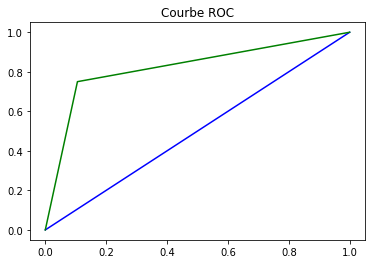

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionsSVC1,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

In [ ]:

SVC=[roc_auc_score(y_test, predictionsSVC),precision_score(y_test,predictionsSVC),
recall_score(y_test,predictionsSVC),
f1_score (y_test,predictionsSVC),
accuracy_score (y_test,predictionsSVC)]
SVC1=[roc_auc_score(y_test, predictionsSVC1),precision_score(y_test,predictionsSVC1),
recall_score(y_test,predictionsSVC1),
f1_score (y_test,predictionsSVC1),
accuracy_score (y_test,predictionsSVC1)]

No handles with labels found to put in legend.


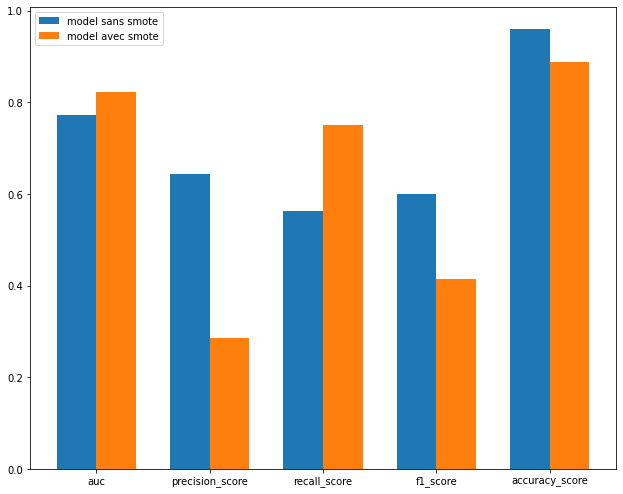

In [ ]:
from matplotlib.image import FigureImage
from matplotlib.pyplot import figure


metr= ["auc","precision_score", "recall_score", "f1_score", "accuracy_score"]

position = np.arange(len(metr))

largeur = .35


fig, ax = plt.subplots()
label=['SVC','SVC1']
plt.legend()
r1 = ax.bar(position - largeur/2, SVC, largeur,label='model sans smote')
r2 = ax.bar(position + largeur/2, SVC1, largeur,label='model avec smote')

ax.set_xticks(position)
ax.set_xticklabels(metr)
ax.legend()
fig.set_size_inches(10.5, 8.5, forward=True)

## **XGBoost**

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       284
           1       0.64      0.44      0.52        16

    accuracy                           0.96       300
   macro avg       0.80      0.71      0.75       300
weighted avg       0.95      0.96      0.95       300

AUC: 0.712


Text(0.5, 15.0, 'Predicted Label')

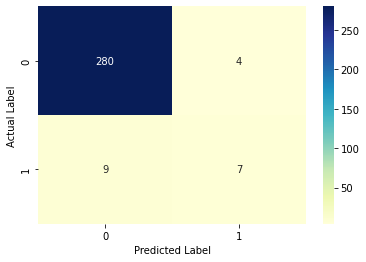

In [ ]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(X_train, y_train)

predictionsxb = xb.predict(X_test)
print(classification_report(y_test, predictionsxb))
auc = roc_auc_score(y_test, predictionsxb)
print('AUC: %.3f' % auc) 
cnf_matrix = confusion_matrix(y_test, predictionsxb )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

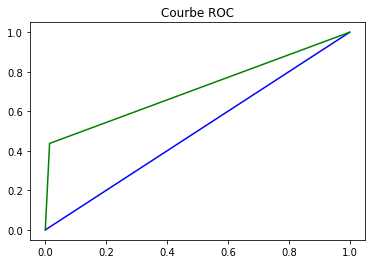

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionsxb,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       284
           1       0.42      0.69      0.52        16

    accuracy                           0.93       300
   macro avg       0.70      0.82      0.74       300
weighted avg       0.95      0.93      0.94       300

AUC: 0.817


Text(0.5, 15.0, 'Predicted Label')

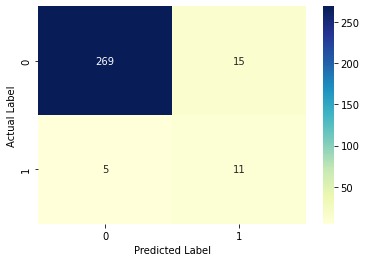

In [ ]:
xb = XGBClassifier()
xb.fit(X_train_res, y_train_res)

predictionsxb1 = xb.predict(X_test)
print(classification_report(y_test, predictionsxb1))
auc = roc_auc_score(y_test, predictionsxb1)
print('AUC: %.3f' % auc) 
cnf_matrix = confusion_matrix(y_test, predictionsxb1 )
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

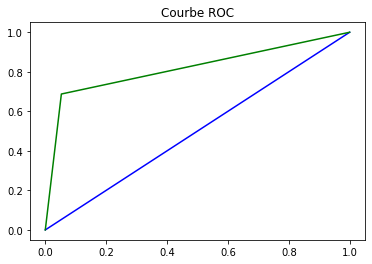

In [ ]:
fprSm, tprSm, _ = metrics.roc_curve(y_test, predictionsxb1,pos_label=1)
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),'b')
plt.plot(fprSm,tprSm,"g")
plt.title("Courbe ROC")
plt.show()

In [ ]:

xb=[roc_auc_score(y_test, predictionsxb),precision_score(y_test,predictionsxb),
recall_score(y_test,predictionsxb),
f1_score (y_test,predictionsxb),
accuracy_score (y_test,predictionsxb)]
xb1=[roc_auc_score(y_test, predictionsxb1),precision_score(y_test,predictionsxb1),
recall_score(y_test,predictionsxb1),
f1_score (y_test,predictionsxb1),
accuracy_score (y_test,predictionsxb1)]

No handles with labels found to put in legend.


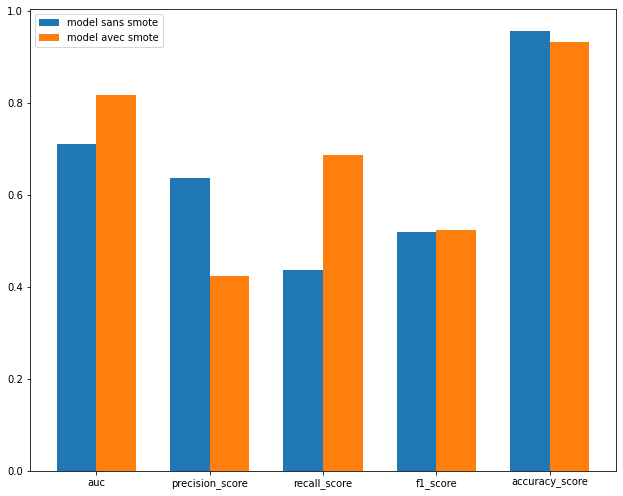

In [ ]:
metr= ["auc","precision_score", "recall_score", "f1_score", "accuracy_score"]

position = np.arange(len(metr))

largeur = .35


fig, ax = plt.subplots()
label=['xb','xb1']
plt.legend()
r1 = ax.bar(position - largeur/2, xb, largeur,label='model sans smote')
r2 = ax.bar(position + largeur/2, xb1, largeur,label='model avec smote')

ax.set_xticks(position)
ax.set_xticklabels(metr)
ax.legend()
fig.set_size_inches(10.5, 8.5, forward=True)

## **Comparison**

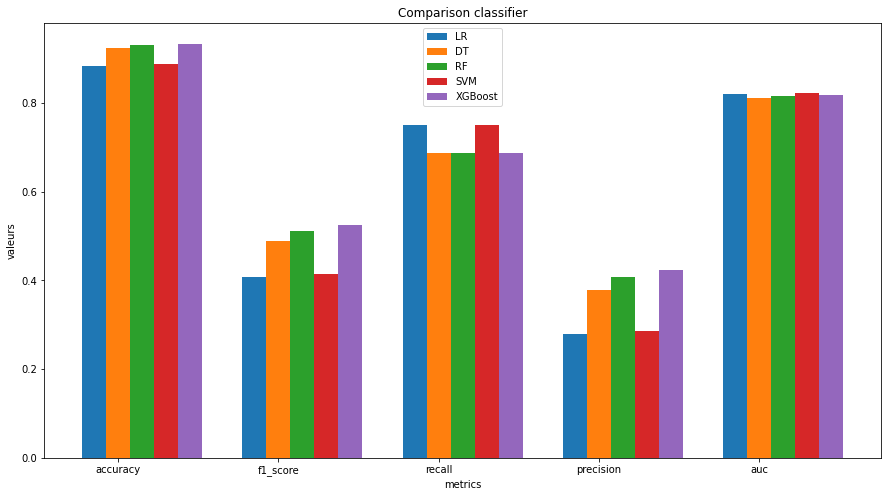

In [ ]:
from IPython.core.pylabtools import figsize
from numpy.ma.core import size

import numpy as np
import matplotlib.pyplot as plt
N = 5
ind = np.arange(5) 
width = 0.15

fig = plt.figure(figsize = (15,8))

xvals = [lr1[4],lr1[3],lr1[2],lr1[1],lr1[0]]
bar1 = plt.bar(ind, xvals, width)
  
yvals = [dt1[4],dt1[3],dt1[2],dt1[1],dt1[0]]
bar2 = plt.bar(ind+width, yvals, width)
  
zvals = [rf1[4],rf1[3],rf1[2],rf1[1],rf1[0]]
bar3 = plt.bar(ind+width*2, zvals, width)

tvals = [SVC1[4],SVC1[3],SVC1[2],SVC1[1],SVC1[0]]
bar4 = plt.bar(ind+width*3, tvals, width)

wvals = [xb1[4],xb1[3],xb1[2],xb1[1],xb1[0]]
bar5 = plt.bar(ind+width*4, wvals, width)

plt.xlabel("metrics")
plt.ylabel('valeurs')
plt.title("Comparison classifier")  
plt.xticks(ind+width,['accuracy', 'f1_score', 'recall','precision','auc'])
plt.legend( (bar1, bar2, bar3,bar4,bar5), ('LR', 'DT', 'RF','SVM','XGBoost') )
plt.show()


